Module 1 Project trial code

In [2]:
import sys
print(sys.executable)

c:\Users\vinee\AppData\Local\Programs\Python\Python313\python.exe


3.1 MNIST DATASET   

Load the dataset
Use 2000 samples from the test dataset and normalize the values of pixels

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [22]:
#Load the MNIST dataset 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [23]:
#Understand the dataset
print("train_images:", type(train_images), train_images.shape, train_images.dtype)
print("train_labels:", type(train_labels), train_labels.shape, train_labels.dtype)

print("test_images:", type(test_images), test_images.shape, test_images.dtype)
print("test_labels:", type(test_labels), test_labels.shape, test_labels.dtype)

train_images: <class 'numpy.ndarray'> (60000, 28, 28) uint8
train_labels: <class 'numpy.ndarray'> (60000,) uint8
test_images: <class 'numpy.ndarray'> (10000, 28, 28) uint8
test_labels: <class 'numpy.ndarray'> (10000,) uint8


In [24]:
#See what the dataset contains
print("labels is " ,train_labels) 
print("shape of each train image is " , train_images[0].shape)
print("train image at 0 is" ,train_images[0])


labels is  [5 0 4 ... 5 6 8]
shape of each train image is  (28, 28)
train image at 0 is [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  

In [25]:
#Use the first 2000 samples from the dataset
num_samples = 2000

#Extract the first 2000 samples from the dataset
test_data = test_images[:num_samples]
test_data.shape

(2000, 28, 28)

In [26]:
#Scale the pixel values to the range [0, 1]
test_data = test_data.astype('float32')/255.0

3.2 Data Preprocessing

Each image is flattened into a vector of size 784 (28x28). A matrix X ∈ R 2000×784 is created, where each row represents a flattened image.

In [27]:
#Flatten the data
flattened_data = test_data.reshape(num_samples, 28*28)

print(flattened_data.shape)


(2000, 784)


In [28]:
#Prepare a matrix using the flattened data 
X = flattened_data
print(X.shape)

(2000, 784)


3.3 Eigen Decomposition 

We compute the sample covariance matrix of X and perform eigen decomposition. The eigenvalues represent the variance explained by each principal component.

In [29]:
# Calculate the sample covariance matrix of X
C = np.cov(X.T)
print(C.shape)

(784, 784)


In [30]:
# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(C)

print("Shape of eigenvalues is ", eigenvalues.shape)
print("Shape of eigenvectors is ", eigenvectors.shape)

Shape of eigenvalues is  (784,)
Shape of eigenvectors is  (784, 784)


TASK1

Use the eigenvalues to calculate the percentage of variance explained. Plot the cumulative sum of these percentages versus the number of components.

In [76]:
#print("Eigenvalues are ", eigenvalues)
#print("Eigenvectors are ", eigenvectors)

In [ ]:
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
#print("Sorted eigenvalues are ", sorted_eigenvalues)

sorted_eigenvectors = eigenvectors[:, sorted_indices]

#print(f'Sorted eigenvalues (first 10): {sorted_eigenvalues[:10]}')

Sorted eigenvalues (first 10): [4.80597342 3.73955757 2.9241815  2.47317793 2.35264162 1.95582307
 1.6078875  1.38815103 1.32126722 1.09577512]


Total variance is  49.47610265635571


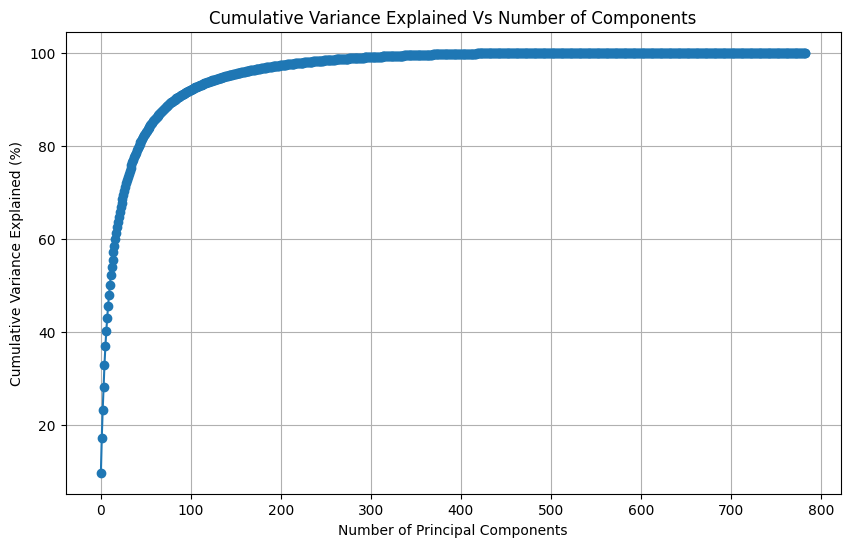

In [ ]:
#Calculate the total variance 
total_variance = np.sum(sorted_eigenvalues)
print("Total variance is ", total_variance)

# Calculate the percentage of variance explained by each principal component
variance_percentage = (sorted_eigenvalues/total_variance)*100

# Calculate the cumulative variance percentage
cumulative_variance = np.cumsum(variance_percentage)
#print("Cumulative variance is ", cumulative_variance)

# Plot the cumulative variance percentage
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained Vs Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.grid(True)
plt.show()

Above graph tells us that by using only the first 250 components, we can capture a significant amount of the total variance.

TASK 2: PCA for Dimensionality reduction

In [69]:
p_values = [50, 250, 500]

#Perform Dimensionality Reduction using PCA
reduced_data = {}
for p in p_values:
    #Select the top p eigenvectors
    top_p_eigenvectors = eigenvectors[:, -p:]

    #Project the data onto the top p eigenvectors
    reduced_data[p] = np.dot(X, top_p_eigenvectors)
    print(f'Reduced data shape with {p} components: {reduced_data[p].shape}')

Reduced data shape with 50 components: (2000, 50)
Reduced data shape with 250 components: (2000, 250)
Reduced data shape with 500 components: (2000, 500)


We see that the components get reduced by the value of chosen p

Task 3: Data Reconstruction
Using the reduced data from Task 2, reconstruct the original images. Use the property
of orthonormal matrices for reconstruction.

Reduced data shape with 50 components: (2000, 50)
Reduced data shape with 250 components: (2000, 250)
Reduced data shape with 500 components: (2000, 500)


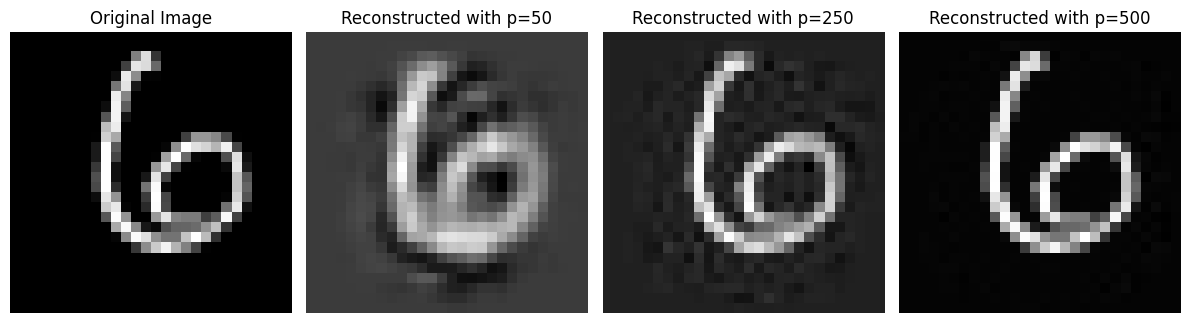

In [70]:
p_values = [50, 250, 500]

# Perform Dimensionality Reduction using PCA 
# And Data Reconstruction
reduced_data = {}
reconstructed_images = {}
for p in p_values:
    #Select the top p eigenvectors
    top_p_eigenvectors = eigenvectors[:, -p:]

    #Project the data onto the top p eigenvectors
    reduced_data[p] = np.dot(X, top_p_eigenvectors)
    print(f'Reduced data shape with {p} components: {reduced_data[p].shape}')
    
    reconstructed = np.dot(reduced_data[p], top_p_eigenvectors.T)
    reconstructed_images[p] = reconstructed.reshape(num_samples, 28, 28)
    #print(f'Reconstructed images shape with {p} components: {reconstructed_images[p].shape}')
    
    
# Display original and reconstructed images for comparison
img_index = 100  # Change this index to view different images
plt.figure(figsize=(12, 4))
plt.subplot(1, len(p_values) + 1, 1)
plt.title('Original Image')
plt.imshow(test_data[img_index], cmap='gray')
plt.axis('off')

for i, p in enumerate(p_values):
    plt.subplot(1, len(p_values) + 1, i + 2)
    plt.title(f'Reconstructed with p={p}')
    plt.imshow(reconstructed_images[p][img_index], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
    
    

Task 4: Error Comparison (PSNR)

Compare the error between the original and reconstructed images for 5 randomly selected
images using Peak Signal-to-Noise Ratio (PSNR).

In [71]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [72]:
from math import log10, sqrt

random_indices = np.random.choice(num_samples, size=5, replace=False)
print("Randomly selected image indices for PSNR comparison:", random_indices)

psnr_results = {}
for p in p_values:
    print(f'\nPSNR values for reconstructed images with p={p}:')
    psnr_values = []
    for idx in random_indices:
        original = test_data[idx]
        reconstructed = reconstructed_images[p][idx]
        
        psnr_value = PSNR(original, reconstructed)
        print(f'Image index {idx}: PSNR = {psnr_value:.2f} dB')
        psnr_values.append(psnr_value)
    psnr_results[p] = psnr_values

#Print PSNR results
print("\nSummary of PSNR values for different p values:")
for p in p_values:
    print(f'p={p}: PSNR values = {psnr_results[p]}')

Randomly selected image indices for PSNR comparison: [1292 1350 1856 1723 1509]

PSNR values for reconstructed images with p=50:
Image index 1292: PSNR = 69.14 dB
Image index 1350: PSNR = 73.26 dB
Image index 1856: PSNR = 65.26 dB
Image index 1723: PSNR = 69.61 dB
Image index 1509: PSNR = 66.27 dB

PSNR values for reconstructed images with p=250:
Image index 1292: PSNR = 78.55 dB
Image index 1350: PSNR = 86.23 dB
Image index 1856: PSNR = 75.72 dB
Image index 1723: PSNR = 78.65 dB
Image index 1509: PSNR = 76.21 dB

PSNR values for reconstructed images with p=500:
Image index 1292: PSNR = 101.25 dB
Image index 1350: PSNR = 109.03 dB
Image index 1856: PSNR = 92.90 dB
Image index 1723: PSNR = 101.29 dB
Image index 1509: PSNR = 97.69 dB

Summary of PSNR values for different p values:
p=50: PSNR values = [69.13520065865112, 73.26384208866995, 65.25997134026485, 69.60894906357355, 66.2713558016691]
p=250: PSNR values = [78.54871920064866, 86.23378876891393, 75.71731774289043, 78.6466440650833

TAKEAWAY: Higher PSNR values suggest less reconstruction error.